In [1]:
library(data.table)
library(ggplot2)
library(qvalue)

In [2]:
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"

In [3]:
# all results
myfile = paste0(saige_dir, "all_cis_rare_with_dTSS_weights.results.txt")
df_all = as.data.frame(fread(myfile))
head(df_all)

,celltype,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Plasma,A1BG,null,0,0.05,dTSS,0.8766689,0.6772141,NA,0.9442545,0.7618615,0.007958452,0.002500256,23392.80,561,1340
2,Plasma,A1BG,null,0,0.05,Beta_1_25,0.6739423,0.5819687,NA,0.4340790,0.8364173,-0.002087573,0.006287923,23904.00,561,1340
3,Plasma,A1BG,null,0,0.05,Equal_Weights,0.7201885,0.5936323,NA,0.5116708,0.8611497,-0.022259367,0.380390295,23904.00,561,1340
4,Plasma,A1BG,Cauchy,NA,NA,NA,0.7907711,0.6200851,NA,0.8405194,0.8278134,NA,NA,NA,NA,NA
5,Plasma,AAAS,null,0,0.05,dTSS,0.6182132,0.7822394,NA,0.3631167,0.6213246,0.183845477,0.262531214,60774.94,1300,2874
6,Plasma,AAAS,null,0,0.05,Beta_1_25,0.6642145,0.8399541,NA,0.2850562,0.6909263,0.003461475,0.003047685,61285.00,1300,2874


In [4]:
# conditional results
myfile = paste0(saige_dir, "all_cis_rare_with_dTSS_weights_cond.results.txt")
df_cond = as.data.frame(fread(myfile))
head(df_cond)

,celltype,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,⋯,Pvalue_cond,Pvalue_ACATV_cond,Pvalue_SKATO_cond,Pvalue_Burden_cond,Pvalue_SKAT_cond,BETA_Burden_cond,SE_Burden_cond,MAC,Number_rare,Number_ultra_rare
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,CD4_NC,LINC00969,null,0,0.05,dTSS,1.923482e-38,2.879839e-31,NA,4.125166e-10,⋯,9.495110e-07,3.418401e-07,NA,0.3107139,4.270310e-06,3.180032e-02,3.219778e-02,84390.16,1749,3255
2,CD4_NC,LINC00969,null,0,0.05,Beta_1_25,7.828874e-30,2.609625e-30,NA,2.694507e-01,⋯,7.019438e-05,2.340261e-05,NA,0.6606641,9.767935e-02,-2.772587e-04,3.346303e-04,85095.00,1749,3255
3,CD4_NC,LINC00969,null,0,0.05,Equal_Weights,8.814237e-30,2.938079e-30,NA,1.134367e-01,⋯,9.427627e-06,3.142622e-06,NA,0.7531078,8.655739e-02,-2.254255e-03,1.647120e-03,85095.00,1749,3255
4,CD4_NC,LINC00969,Cauchy,NA,NA,NA,5.770447e-38,7.149714e-31,NA,1.237550e-09,⋯,2.556474e-06,9.128863e-07,NA,0.5923713,1.280977e-05,NA,NA,NA,NA,NA
5,B_Mem,RPS3A,null,0,0.05,dTSS,7.000958e-98,2.333653e-98,NA,1.794583e-21,⋯,1.131633e-02,3.830450e-03,NA,0.7036219,1.477248e-01,-4.184013e-03,3.911418e-03,97627.32,1703,3695
6,B_Mem,RPS3A,null,0,0.05,Beta_1_25,5.324147e-97,1.774716e-97,NA,5.650971e-18,⋯,1.000000e+00,1.000000e+00,NA,0.6893001,9.992062e-01,6.761632e-05,6.845594e-05,98125.00,1703,3695


In [5]:
celltypes = unique(df_all$celltype)

In [6]:
df_to_plot = data.frame()
for (celltype in celltypes){
    # all results
    df0 = df_all[df_all$celltype == celltype & df_all$Group == "Cauchy",]
    df0 <- df0[rowSums(is.na(df0)) != ncol(df0), ]
    df0$qv = qvalue(df0$Pvalue)$qvalues
    # conditional results
    df1 = df_cond[df_cond$celltype == celltype & df_cond$Group == "Cauchy",]
    df1 <- df1[rowSums(is.na(df1)) != ncol(df1), ]
    df1$qv = qvalue(df1$Pvalue_cond)$qvalues
    # combine
    new_df = data.frame(celltype = celltype,
                       n_cauchy = nrow(df0[df0$qv < 0.05,]),
                       n_cauchy_cond = nrow(df1[df1$qv < 0.05,]))
    df_to_plot = rbind(df_to_plot, new_df)
}
head(df_to_plot)

,celltype,n_cauchy,n_cauchy_cond
,<chr>,<int>,<int>
1,Plasma,16,1
2,NK,832,117
3,NK_R,46,8
4,Mono_NC,162,12
5,Mono_C,241,34
6,DC,71,10


In [7]:
df_to_plot$celltype <- factor(df_to_plot$celltype, 
                                    levels = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK",
                                               "NK_R","Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
# df_colours

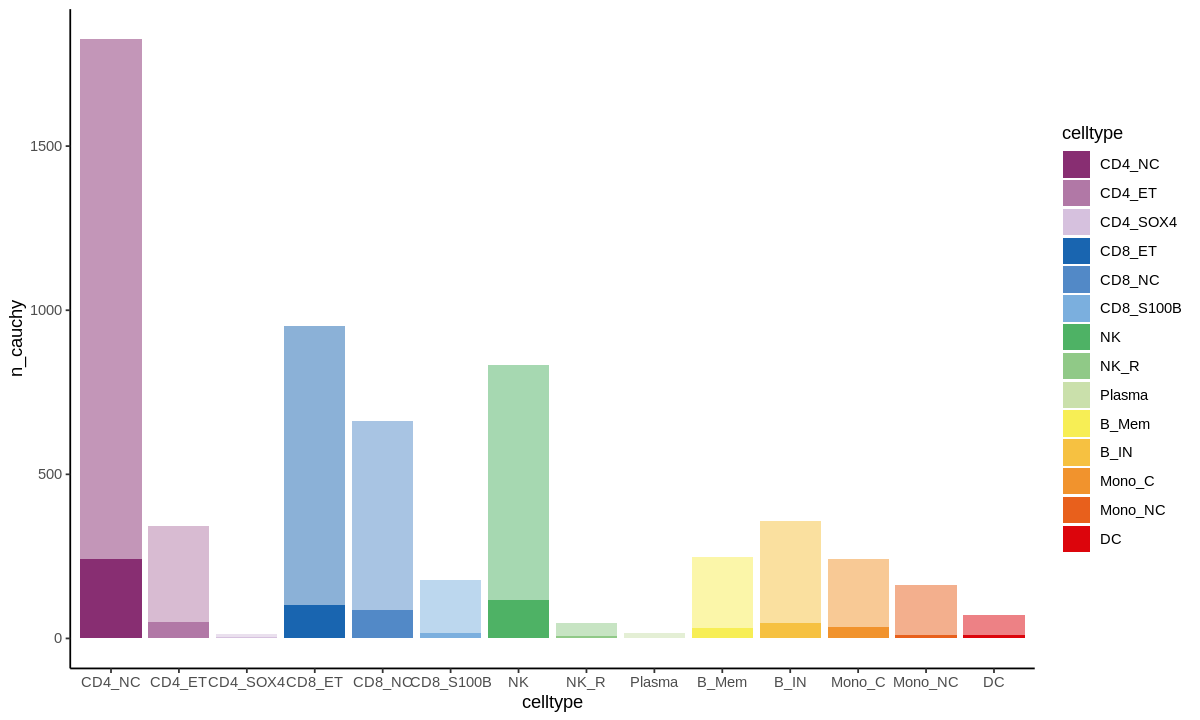

In [8]:
options(repr.plot.width = 10, repr.plot.height = 6)
p = ggplot(df_to_plot, aes(x=celltype, y=n_cauchy, fill=celltype)) + geom_bar(stat = "identity", alpha=0.5)
p = p + geom_bar(aes(x=celltype, y=n_cauchy_cond, fill=celltype), stat = "identity")
p = p + scale_fill_manual(values = df_colours$colours) + theme_classic()
p 

In [9]:
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"RV_eGenes_Cauchy_conditional.pdf"), width=10, height=6)
p
dev.off()

png 
  2

In [10]:
# Number of eQTLs
sum(df_to_plot$n_cauchy_cond)
# Number of unique eGenes
df_cond$qv = qvalue(df_cond$Pvalue_cond)$qvalues
length(unique(df_cond[df_cond$qv < 0.05,"Region"]))

[1] 763

[1] 481